Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Jingren Wang"
COLLABORATORS = "N.A."

---

# CS110 Pre-class Work 2.1

## Question 1.

First, please read carefully [this note](https://drive.google.com/open?id=1SfrRTKWDb6szsJENgvNF7-u2B96ecaF2) which reviews the MERGE operation in Cormen et al.

After reviewing the example above (Cormen et. al., Figure 2.3),  you need to manually create similar illustrations as in the example above but this time for the input array:

![array](array.png)

For this exercise, assume that the call to the algorithm is MERGE(A, 1, 3, 6) and draw different resulting stages of the arrays A, L, and R as the merge algorithm is executed.  You can hand-draw or use any drawing tool to produce panel illustrations as in the example above.  Include your final drawings in the cell below. Feel free to use additional cells (Markdown or Code) for this question.


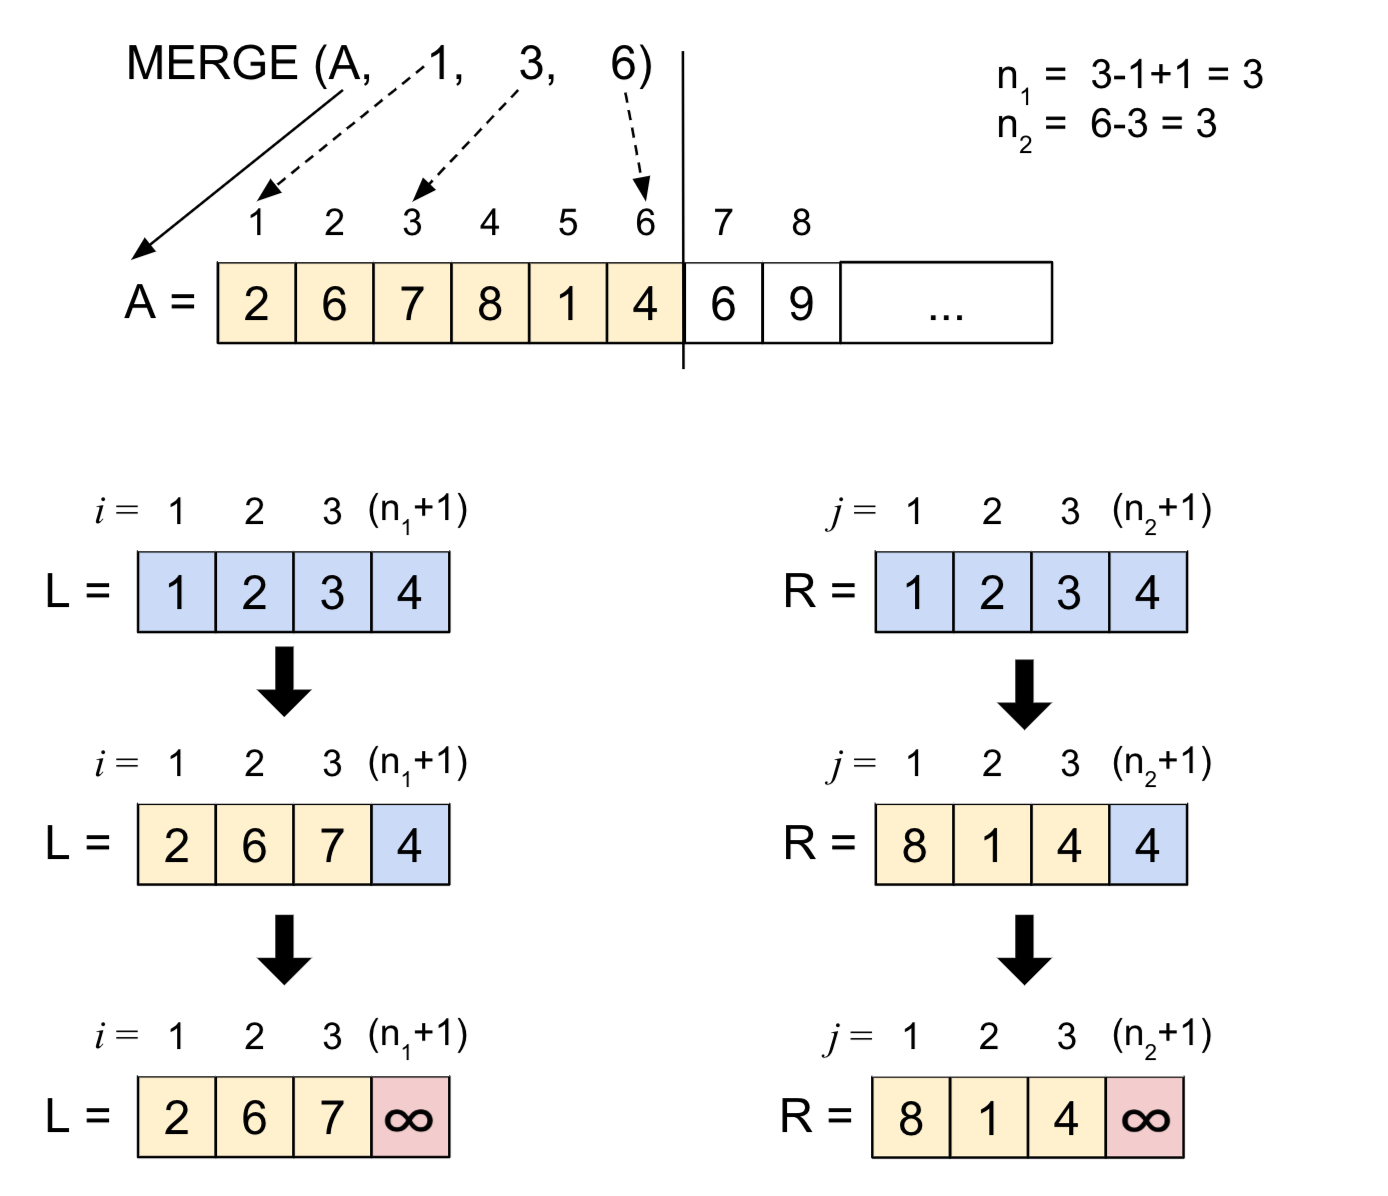

## Question 2.
Now using your understanding of Part I of the merge algorithm, can you think of an efficient way to implement this part in Python? (hint: using Python list). Give your answer in prose in the cell below.

My approach is to initialize two python lists named L and R, such that L = [1,...n_1+1], and R = [1,....n_2+1], and retrieve numbers from A to assign to L and R respectively according to the pseudocode iterations. I will use the list(range(1, n+2)), where n=n_1 or n_2, to initialize L and R

## Question 3.

Write a Python implementation of the merge pseudocode (both parts), your Python function must take the same four input arguments as described in the $MERGE(A,p,q,r)$. Test your code by running the example in problem 1 and 2 of this pre-class work. Feel free to come up with additional cases to check if your code is working properly. Your code should return A 

In [2]:
import math

# add a global counter for question 5 and 6

def merge(A,p,q,r):
    global count
    
    #part 1
    n_1 = q-p+1
    count += 1
    n_2 = r-q
    count += 1
    # initialize L and R
    L = list(range(n_1+1))
    count += 1
    R = list(range(n_2+1))
    count += 1
    #assign A elements to L and R
    count += 1 # counter +1 for every for loop for last round
    for i in range(n_1):   # 0,1,...n_1
        L[i] = A[p+i-1]
        count += 1
    count += 1
    for j in range(n_2):
        R[j] = A[q+j]
        count += 1
    # assign last element to infinity
    L[n_1] = math.inf
    count += 1
    R[n_2] = math.inf
    count += 1
    
    #part 2
    i = 0
    count += 1
    j = 0
    count += 1
    
    count += 1
    for k in range(p-1, r):
        if L[i] <= R[j]:
            count += 1
            A[k] = L[i]
            count += 1
            i += 1
            count += 1
        else:
            A[k] = R[j]
            count += 1
            j += 1
            count += 1
            
    return A
    # YOUR CODE HERE
    raise NotImplementedError()

#sample test case
A = [2,6,7,8,1,4,6,9]
p = 1
q = 3
r = 6
M = merge(A,p,q,r)
A_sorted = A #after merge should give A
print(M == A_sorted) 

#another test case
A = [6,1]
p = 1
r = len(A)
q = int((p+2)/2)
M = merge(A,p,q,r)
A_sorted = [1,6]
print(M==A_sorted)

# third test case
A = [3]
p = 1
r = len(A)
q = int((p+2)/2)
M = merge(A,p,q,r)
A_sorted = [3]
print(M==A_sorted)
    

NameError: name 'count' is not defined

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2
Suppose that your Python implementation of the merge algorithm is already working. Inspect the code for merge sort below:

In [ ]:
def merge_sort(A,p,r):
    if p < r:
        q = (p+r)/2
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
    return(A)

Copy and paste the code above to the cell below and fix the bug in it. 

In [ ]:
def merge_sort(A,p,r):
    global count
    count = 0 
    
    if p < r:
        count += 1
        q = int((p+r)/2)  # must be floor int number for proper indexing
        count += 1
        merge_sort(A,p,q)
        count += 1
        merge_sort(A,q+1,r)
        count += 1
        merge(A,p,q,r)
        count += 1
    return A   # updates A 

    raise NotImplementedError()

# sample test case
A = [2,8,7,6,1,4,6,9]
p = 1  #1st element
r = len(A)  #length of A
M = merge_sort(A,p,r)



print(A)

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

# Question 5.
As in the previous Lesson, count the number of steps and time your merge_sort() function with the following input: `list_k = [i for i in range(100*k, 0, -1)] `, where $k= 1, 2, 3, …, 15 $. 


In [ ]:
# YOUR CODE HERE
import time # for runtime calculation
import matplotlib.pyplot as plt  # for plotting

def get_MergeSort_data():
    n_list = []  # list of input size, n = 100*k
    steps_list = [] # list of step for each k
    runTime_list = [] # list of running time for each k
    global count  # must initiate again!
    
    count += 1
    for k in range(1,15):

        count = 0
        list_k = [i for i in range(100*k, 0, -1)]
        p = 1
        r = len(list_k)
        n_list.append(r)

        start_time = time.clock()
        merge_sort(list_k,p,r)
        runTime = time.clock()-start_time
        runTime_list.append(runTime)
        
        steps_list.append(count)
        
    return n_list,steps_list,runTime_list

    raise NotImplementedError()


In [ ]:
# plot growth of steps: merge sort

M = get_MergeSort_data()

n_list = M[0]
steps_list =M[1]
runTime_list = M[2]

x1 = n_list
y1 = steps_list

plt.title("Growth of steps: merge sort")
plt.xlabel('input size(n)')
plt.ylabel('number of steps')
plt.plot(x1,y1)
plt.show()


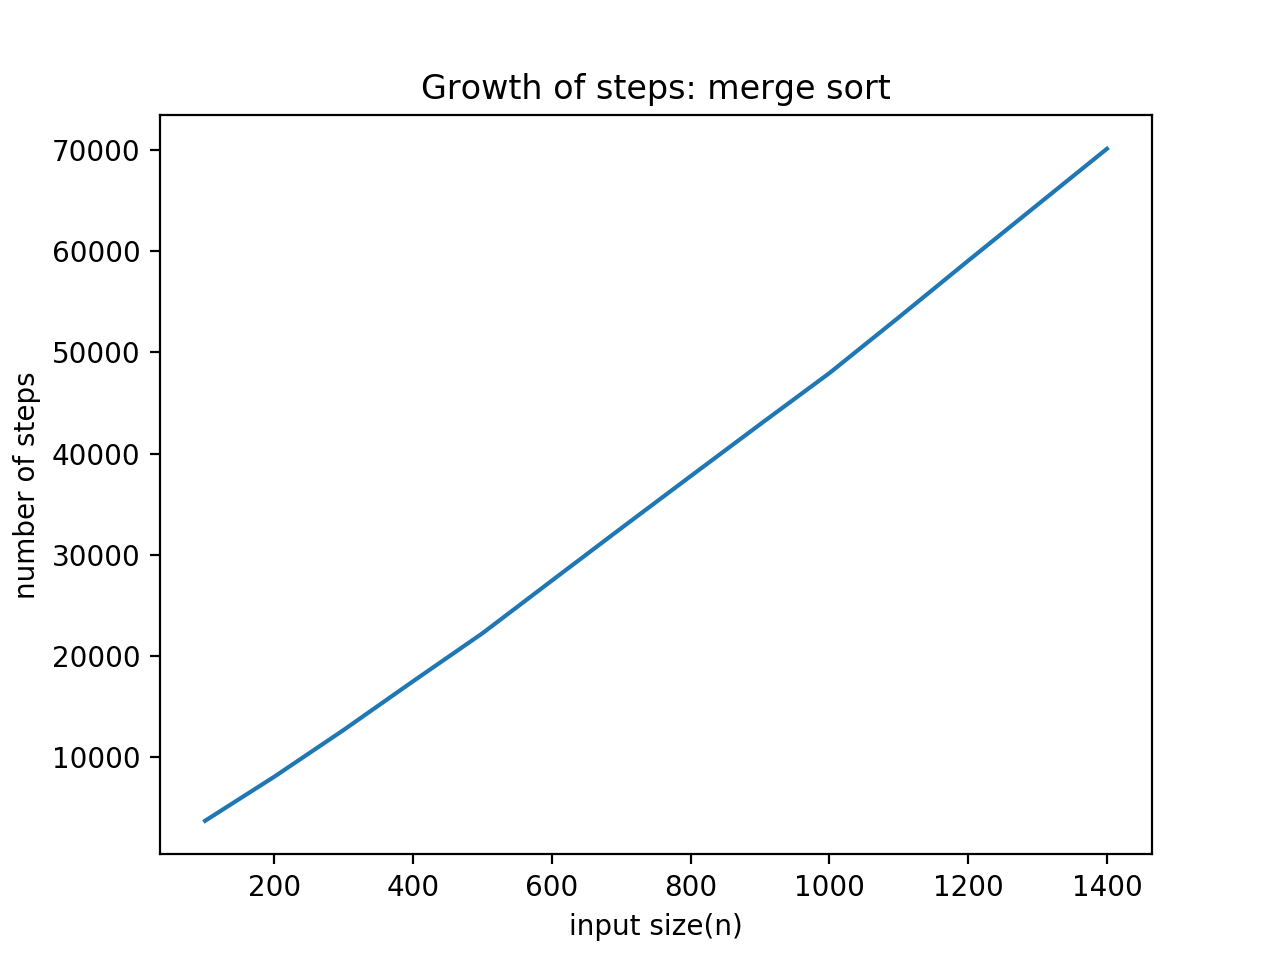

In [ ]:
# plot growth of runTime: merge sort
x2 = n_list
y2 = runTime_list

plt.title("Growth of running time: merge sort")
plt.xlabel('input size(n)')
plt.ylabel('number of steps')
plt.plot(x2,y2)
plt.show()

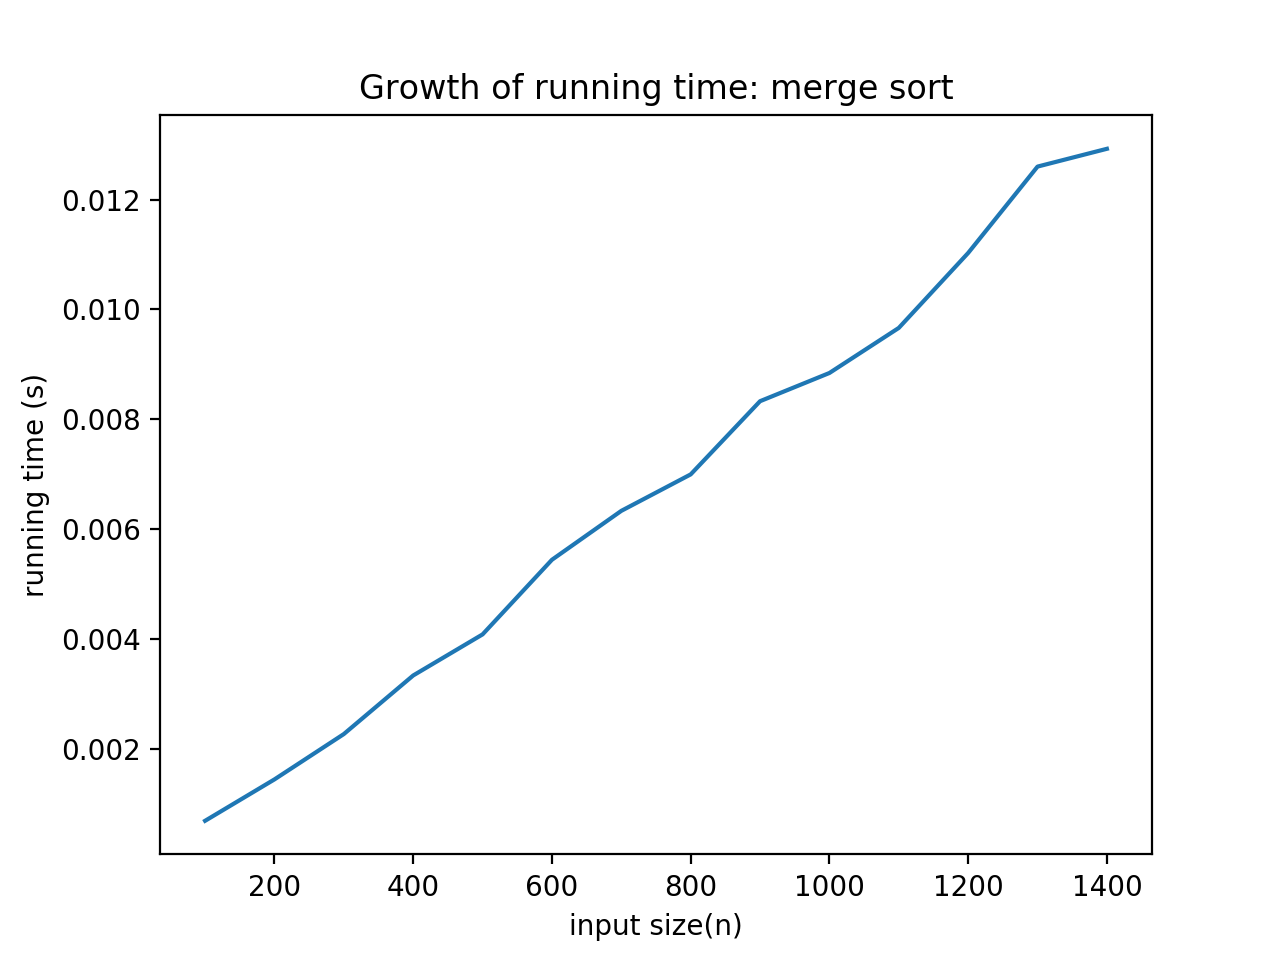

# Question 6. 
Use the code you wrote for Lesson 1.2 (i.e., selection sort, bubble sort, insertion sort). Plot the following graphs:
* **Graph 1**: 4 lines for **the number of steps** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why? 
* **Graph 2**: 4 lines for **the timing** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why?

Using as many cells as you wish (code cells or markdown cells alike) to complete this question.


In [ ]:
#insertion sort on counter
def insertionSort(A):
    # introduce global counter variable
    global count
    count = 0
    
    count += 1
    for j in range(1,len(A)):
        key = A[j]
        count += 1
        i= j-1
        count += 1
        while i >= 0 and A[i]>key:
            count += 1  # count step for while statement evaluation
            A[i+1] = A[i]
            count += 1
            i -= 1
            count += 1
        A[i+1] = key
        count += 1
        
    return A
    raise NotImplementedError()

In [ ]:
def get_InsertionSort_data():
    n_list = []  # list of input size, n = 100*k
    steps_list = [] # list of step for each k
    runTime_list = [] # list of running time for each k
    global count
    
    for k in range(1,15):
        
        count = 0
        list_k = [i for i in range(100*k, 0, -1)]
        p = 1
        r = len(list_k)
        n_list.append(r)

        start_time = time.clock()
        insertionSort(list_k)
        runTime = time.clock()-start_time
        runTime_list.append(runTime)

        steps_list.append(count)
        
    return n_list,steps_list,runTime_list

    raise NotImplementedError()

In [ ]:
# plot growth of steps: merge sort

I = get_InsertionSort_data()

n_list = I[0]
steps_list =I[1]
runTime_list = I[2]

x1 = n_list
y1 = steps_list

plt.title("Growth of steps: Insertion sort")
plt.xlabel('input size(n)')
plt.ylabel('number of steps')
plt.plot(x1,y1)
plt.show()

In [ ]:
def bubbleSort(A):
    global count
    count = 0
    b = 0 # initialize a bin variable for temporary keeping of swapped item
    count += 1
    n = len(A) #length of list items
    count += 1
    
    count += 1
    for i in range(n-1):  # i from 0 to n-1
        count += 1
        for j in range(n-1,i,-1): # j from n-1 to 1(for first round)
            count += 1
            
            if A[j]< A[j-1]:
                count += 1
                b = A[j-1]
                count += 1
                A[j-1] = A[j]
                count += 1
                A[j] = b   # three-step swap
                count += 1
    return A       
    raise NotImplementedError()

In [ ]:
def get_BubbleSort_data():
    n_list = []  # list of input size, n = 100*k
    steps_list = [] # list of step for each k
    runTime_list = [] # list of running time for each k
    global count
           
    for k in range(1,15):
        
        count = 0
        
        list_k = [i for i in range(100*k, 0, -1)]
        p = 1
        r = len(list_k)
        n_list.append(r)

        start_time = time.clock()
        bubbleSort(list_k)
        runTime = time.clock()-start_time
        runTime_list.append(runTime)

        steps_list.append(count)
        
    return n_list,steps_list,runTime_list

    raise NotImplementedError()

In [ ]:
# plot growth of steps: bubble sort

B = get_BubbleSort_data()

n_list = B[0]
steps_list =B[1]
runTime_list = B[2]

x1 = n_list
y1 = steps_list

plt.title("Growth of steps: Bubble sort")
plt.xlabel('input size(n)')
plt.ylabel('number of steps')
plt.plot(x1,y1)
plt.show()

In [ ]:
#selectionSort on counter
def selectionSort(A):
    global count
    count = 0
    
    b = 0 # initialize a b as temporary item holder during swapping
    count += 1
    n = len(A)
    count += 1
    
    count += 1
    for i in range(n-1):  # i in 0 to n-1
        count += 1
        min_idx = i  # index of default minimal 
        count += 1
        
        count += 1
        for j in range(i+1,n):   # j in i+1 to n
            count += 1
            if A[j] < A[min_idx]:
                count += 1
                min_idx = j     #update minimal index
                count += 1
            # swap A[i] with A[min_idx]  
            b = A[min_idx]
            count += 1
            A[min_idx] = A[i]
            count += 1
            A[i] = b   # three-step swap
            count += 1
    return A
    raise NotImplementedError()

In [ ]:
def get_SelectionSort_data():
    n_list = []  # list of input size, n = 100*k
    steps_list = [] # list of step for each k
    runTime_list = [] # list of running time for each k
    global count
    
    for k in range(1,15):
        
        count = 0
        
        list_k = [i for i in range(100*k, 0, -1)]
        p = 1
        r = len(list_k)
        n_list.append(r)

        start_time = time.clock()
        selectionSort(list_k)
        runTime = time.clock()-start_time
        runTime_list.append(runTime)

        steps_list.append(count)
        
    return n_list,steps_list,runTime_list

    raise NotImplementedError()

In [ ]:
# plot growth of steps: selection sort

S = get_SelectionSort_data()

n_list = S[0]
steps_list =S[1]
runTime_list = S[2]

x1 = n_list
y1 = steps_list

plt.title("Growth of steps: Selection sort")
plt.xlabel('input size(n)')
plt.ylabel('number of steps')
plt.plot(x1,y1)
plt.show()

In [ ]:
### combining four sorts

M = get_MergeSort_data()
I = get_InsertionSort_data()
B = get_BubbleSort_data()
S = get_SelectionSort_data()


## First: steps comparison
M_steps = M[1]
I_steps = I[1]
B_steps = B[1]
S_steps = S[1]

x = M[0]  # input size the same 

x_M = x
y_M = M_steps
plt.plot(x_M,y_M, label = "MergeS_step")

x_I = x
y_I = I_steps
plt.plot(x_I,y_I, label = "InsertionS_step")

x_B = x
y_B = B_steps
plt.plot(x_B,y_B, label = "BubbleS_step")

x_S = x
y_S = S_steps
plt.plot(x_S,y_S, label = "SelectionS_step")


# naming the x axis 
plt.xlabel('input size (n)') 
# naming the y axis 
plt.ylabel('number of steps') 
# giving a title to my graph 
plt.title('Growth of steps comparison') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 



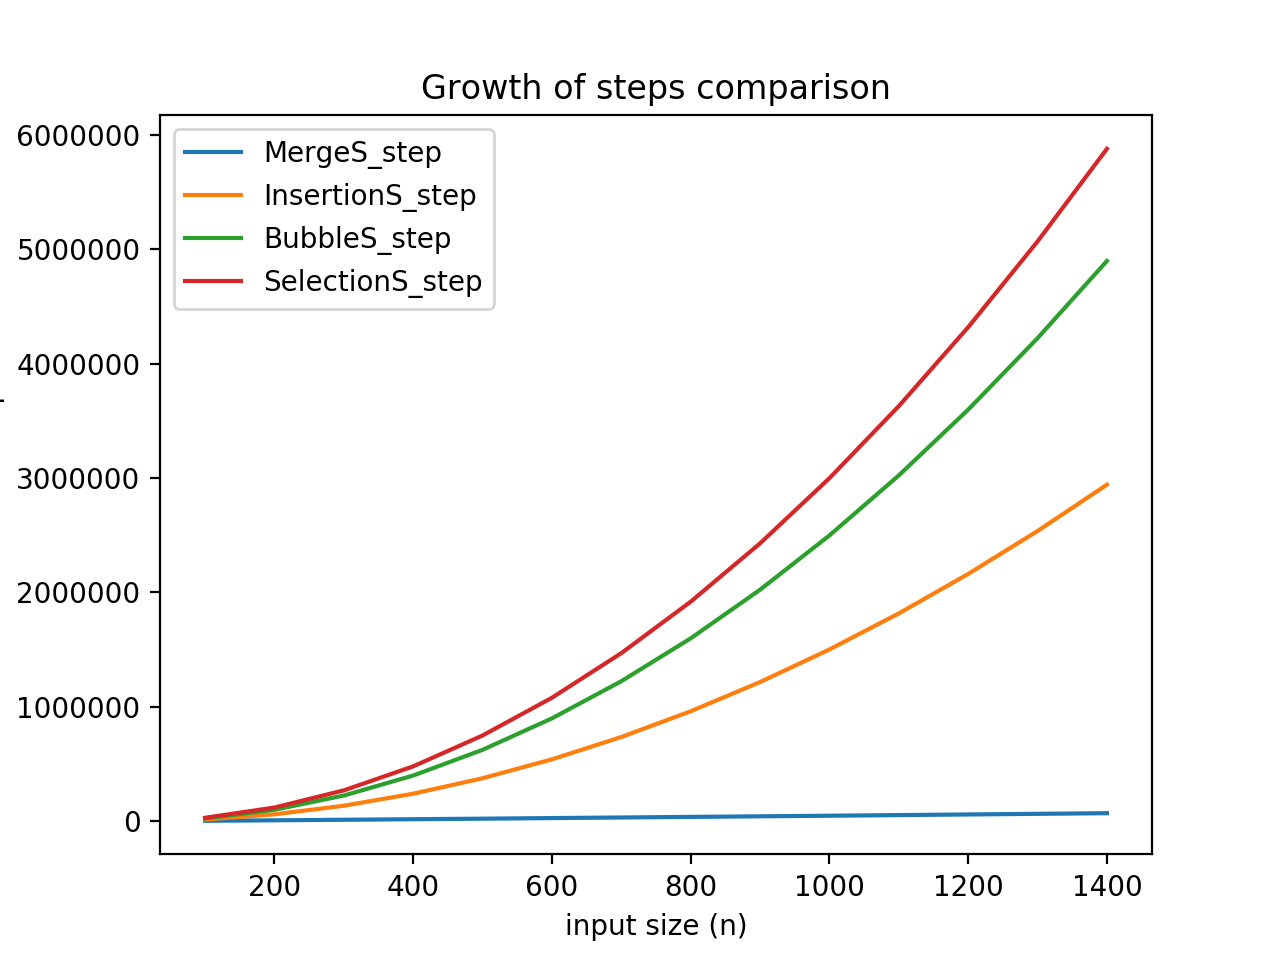

In [ ]:
### combining four sorts

## Second: runTime comparison

M_runTime = M[2]
I_runTime = I[2]
B_runTime = B[2]
S_runTime = S[2]

x = M[0]  # input size the same 

x_M = x
y_M = M_runTime
plt.plot(x_M,y_M, label = "MergeS_runTime")

x_I = x
y_I = I_runTime
plt.plot(x_I,y_I, label = "InsertionS_runTime")

x_B = x
y_B = B_runTime
plt.plot(x_B,y_B, label = "BubbleS_runTime")

x_S = x
y_S = S_runTime
plt.plot(x_S,y_S, label = "SelectionS_runTime")


# naming the x axis 
plt.xlabel('input size (n)') 
# naming the y axis 
plt.ylabel('running time (s)') 
# giving a title to my graph 
plt.title('Growth of running time comparison') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 



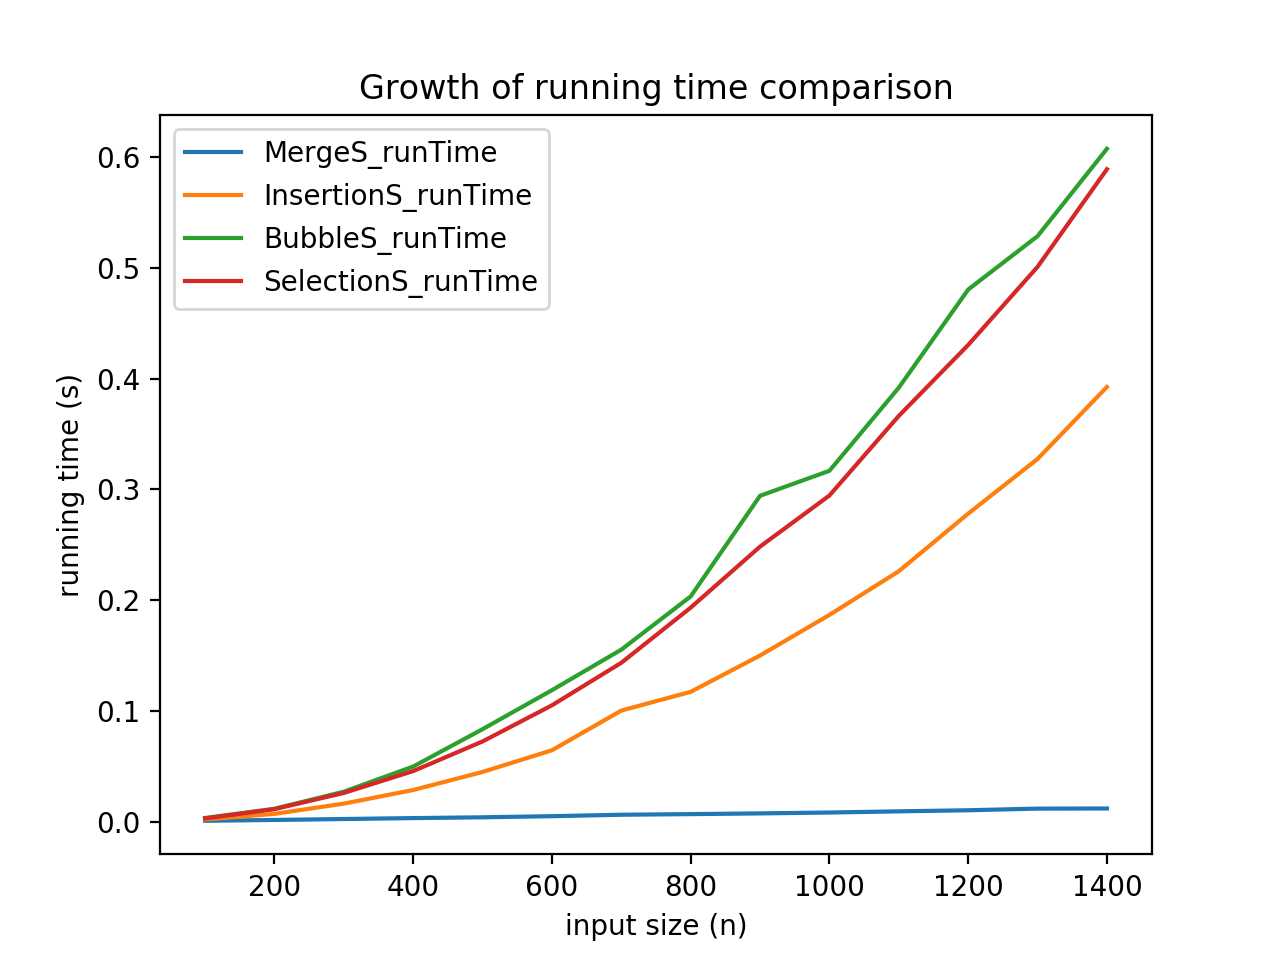